In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats.mstats import mquantiles
import re
from sklearn.model_selection import GridSearchCV
from catboost import CatBoostClassifier
from sklearn.metrics import make_scorer
from matplotlib import pyplot as plt
import shap

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'depth': 5, 'l2_leaf_reg': 13, 'learning_rate': 0.0093}
0:	total: 7.23ms	remaining: 7.23s
1:	total: 15.8ms	remaining: 7.89s
2:	total: 24.3ms	remaining: 8.08s
3:	total: 32.3ms	remaining: 8.04s
4:	total: 40.7ms	remaining: 8.11s
5:	total: 49.6ms	remaining: 8.22s
6:	total: 58.4ms	remaining: 8.28s
7:	total: 66.9ms	remaining: 8.3s
8:	total: 76.2ms	remaining: 8.39s
9:	total: 85.1ms	remaining: 8.43s
10:	total: 94.2ms	remaining: 8.47s
11:	total: 103ms	remaining: 8.5s
12:	total: 114ms	remaining: 8.62s
13:	total: 123ms	remaining: 8.66s
14:	total: 132ms	remaining: 8.64s
15:	total: 140ms	remaining: 8.63s
16:	total: 149ms	remaining: 8.63s
17:	total: 158ms	remaining: 8.63s
18:	total: 168ms	remaining: 8.66s
19:	total: 177ms	remaining: 8.65s
20:	total: 185ms	remaining: 8.64s
21:	total: 194ms	remaining: 8.63s
22:	total: 203ms	remaining: 8.62s
23:	total: 212ms	remaining: 8.61s
24:	total: 220ms	remaining: 8.59s
25:	total: 

242:	total: 2.19s	remaining: 6.81s
243:	total: 2.19s	remaining: 6.8s
244:	total: 2.2s	remaining: 6.79s
245:	total: 2.21s	remaining: 6.79s
246:	total: 2.22s	remaining: 6.78s
247:	total: 2.23s	remaining: 6.77s
248:	total: 2.24s	remaining: 6.76s
249:	total: 2.25s	remaining: 6.75s
250:	total: 2.26s	remaining: 6.74s
251:	total: 2.27s	remaining: 6.73s
252:	total: 2.28s	remaining: 6.72s
253:	total: 2.29s	remaining: 6.71s
254:	total: 2.29s	remaining: 6.71s
255:	total: 2.3s	remaining: 6.7s
256:	total: 2.31s	remaining: 6.69s
257:	total: 2.32s	remaining: 6.68s
258:	total: 2.33s	remaining: 6.67s
259:	total: 2.34s	remaining: 6.66s
260:	total: 2.35s	remaining: 6.65s
261:	total: 2.36s	remaining: 6.64s
262:	total: 2.37s	remaining: 6.64s
263:	total: 2.38s	remaining: 6.63s
264:	total: 2.38s	remaining: 6.62s
265:	total: 2.39s	remaining: 6.61s
266:	total: 2.4s	remaining: 6.6s
267:	total: 2.41s	remaining: 6.59s
268:	total: 2.42s	remaining: 6.58s
269:	total: 2.43s	remaining: 6.57s
270:	total: 2.44s	remainin

498:	total: 4.47s	remaining: 4.49s
499:	total: 4.48s	remaining: 4.48s
500:	total: 4.49s	remaining: 4.47s
501:	total: 4.5s	remaining: 4.46s
502:	total: 4.51s	remaining: 4.46s
503:	total: 4.52s	remaining: 4.45s
504:	total: 4.53s	remaining: 4.44s
505:	total: 4.54s	remaining: 4.43s
506:	total: 4.54s	remaining: 4.42s
507:	total: 4.55s	remaining: 4.41s
508:	total: 4.56s	remaining: 4.4s
509:	total: 4.57s	remaining: 4.39s
510:	total: 4.58s	remaining: 4.38s
511:	total: 4.59s	remaining: 4.37s
512:	total: 4.6s	remaining: 4.36s
513:	total: 4.61s	remaining: 4.36s
514:	total: 4.61s	remaining: 4.35s
515:	total: 4.62s	remaining: 4.34s
516:	total: 4.63s	remaining: 4.33s
517:	total: 4.64s	remaining: 4.32s
518:	total: 4.65s	remaining: 4.31s
519:	total: 4.66s	remaining: 4.3s
520:	total: 4.67s	remaining: 4.29s
521:	total: 4.68s	remaining: 4.28s
522:	total: 4.69s	remaining: 4.27s
523:	total: 4.7s	remaining: 4.26s
524:	total: 4.7s	remaining: 4.25s
525:	total: 4.71s	remaining: 4.25s
526:	total: 4.72s	remainin

755:	total: 6.75s	remaining: 2.18s
756:	total: 6.76s	remaining: 2.17s
757:	total: 6.77s	remaining: 2.16s
758:	total: 6.78s	remaining: 2.15s
759:	total: 6.79s	remaining: 2.14s
760:	total: 6.8s	remaining: 2.13s
761:	total: 6.81s	remaining: 2.13s
762:	total: 6.82s	remaining: 2.12s
763:	total: 6.83s	remaining: 2.11s
764:	total: 6.83s	remaining: 2.1s
765:	total: 6.84s	remaining: 2.09s
766:	total: 6.85s	remaining: 2.08s
767:	total: 6.86s	remaining: 2.07s
768:	total: 6.87s	remaining: 2.06s
769:	total: 6.88s	remaining: 2.05s
770:	total: 6.89s	remaining: 2.04s
771:	total: 6.9s	remaining: 2.04s
772:	total: 6.91s	remaining: 2.03s
773:	total: 6.91s	remaining: 2.02s
774:	total: 6.92s	remaining: 2.01s
775:	total: 6.93s	remaining: 2s
776:	total: 6.94s	remaining: 1.99s
777:	total: 6.95s	remaining: 1.98s
778:	total: 6.96s	remaining: 1.97s
779:	total: 6.97s	remaining: 1.97s
780:	total: 6.97s	remaining: 1.96s
781:	total: 6.98s	remaining: 1.95s
782:	total: 6.99s	remaining: 1.94s
783:	total: 7s	remaining: 

             Feature  Importance
15      RCRI_surgery   41.449074
25      preop_ptt_sm    8.823457
4          preop_asa    6.082847
19         preop_alb    3.874547
26  preop_glucose_sm    3.779894
27      preop_gpt_sm    3.254043
23        preop_k_sm    3.130225
3             weight    3.047537
16               bmi    2.197889
2             height    2.193100
13        preop_egfr    2.174015
17       preop_hb_my    2.055765
18      preop_plt_sm    2.025261
0                age    1.985596
14             em_my    1.878649
21       preop_cr_sm    1.876422
7          preop_cva    1.831140
20         preop_bun    1.825182
28         preop_got    1.807372
24          preop_pt    1.493865
22          preop_na    1.014212
6           preop_dm    0.716133
1                sex    0.517265
9         preop_copd    0.327024
12          preop_tb    0.272035
5          preop_htn    0.151308
10     preop_liverds    0.111731
11    preop_kidneyds    0.066886
8       preop_asthma    0.037525


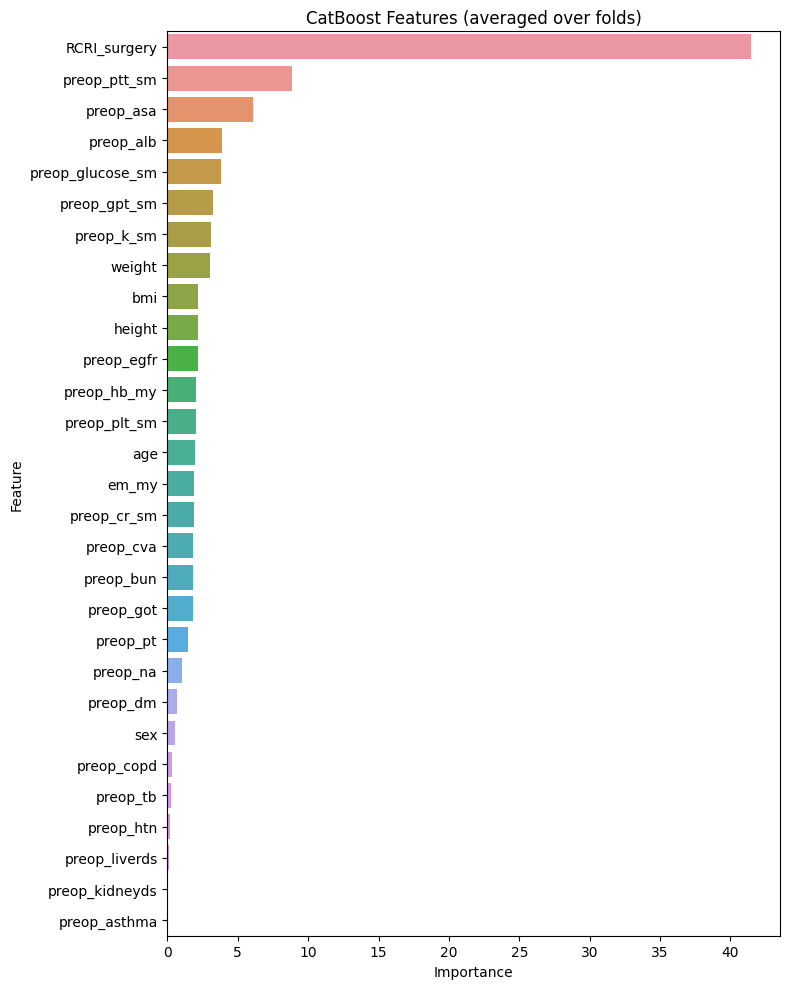

In [2]:
# 데이터 불러오기 및 이름 변경 함수
def load_and_rename_data(auto_score_path, test_set_path):
    df_AutoScore = pd.read_csv(auto_score_path)
    df_AutoScore.rename(columns={'is_stroke':'label'}, inplace=True)
    
    df_test_set = pd.read_csv(test_set_path)
    df_test_set.rename(columns={'is_stroke':'label'}, inplace=True)
    
    return df_AutoScore, df_test_set

# 훈련, 검증, 테스트 데이터 분할 함수
def split_data(df_AutoScore, df_test_set, test_size=0.3, random_state=42):
    X_test = df_test_set.drop('label', axis=1)
    y_test = df_test_set['label']
    
    X = df_AutoScore.drop('label', axis=1)
    y = df_AutoScore['label']
    
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)
    
    return X_train, X_val, y_train, y_val, X_test, y_test

# 모델 학습 및 최적의 파라미터 찾기 함수
def train_model_with_grid_search(X_train, y_train, param_grid, verbose=1, cv=5, scoring='roc_auc'):
    model_cat = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', random_state=42)
    
    gridsearch = GridSearchCV(model_cat, param_grid, verbose=verbose, cv=cv, scoring=scoring)
    
    gridsearch.fit(X_train, y_train, verbose=False)
    
    best_params = gridsearch.best_params_
    print("Best parameters found: ", best_params)
    
    return best_params

# 최적의 파라미터로 모델 다시 훈련 및 피처 중요도 표시 함수
def retrain_and_feature_importance(X_train, y_train, best_params):
    model_cat = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', **best_params, random_state=42)
    model_cat.fit(X_train, y_train)
    
    importance = model_cat.feature_importances_
    feature_name = X_train.columns
    feature_importance_df = pd.DataFrame({'Feature': feature_name, 'Importance': importance})
    feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)
    
    print(feature_importance_df)
    
    plt.figure(figsize=(8, 10))
    sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
    plt.title('CatBoost Features (averaged over folds)')
    plt.tight_layout()
    plt.show()
    
    return model_cat

# SHAP 값 계산 함수
def calculate_shap_values(model_cat, X_train):
    explainer = shap.TreeExplainer(model_cat)
    shap_values = explainer.shap_values(X_train)
    
    return shap_values

# 주요 코드 실행 부분
if __name__ == "__main__":
    auto_score_path = "C:/Users/user/Desktop/Afib 및 AutoScore/afib/최종데이터(3개가제외되었을때)_R.csv"
    test_set_path = "C:/Users/user/Desktop/Afib 및 AutoScore/afib/최종데이터(보라매 3개제외되었을때)_R.csv"
    
    df_AutoScore, df_test_set = load_and_rename_data(auto_score_path, test_set_path)
    
    X_train, X_val, y_train, y_val, X_test, y_test = split_data(df_AutoScore, df_test_set)
    
    param_grid = {'depth': [5], 'learning_rate': [0.0093], 'l2_leaf_reg': [13]}
    
    best_params = train_model_with_grid_search(X_train, y_train, param_grid)
    
    model_cat = retrain_and_feature_importance(X_train, y_train, best_params)
    
    shap_values = calculate_shap_values(model_cat, X_train)

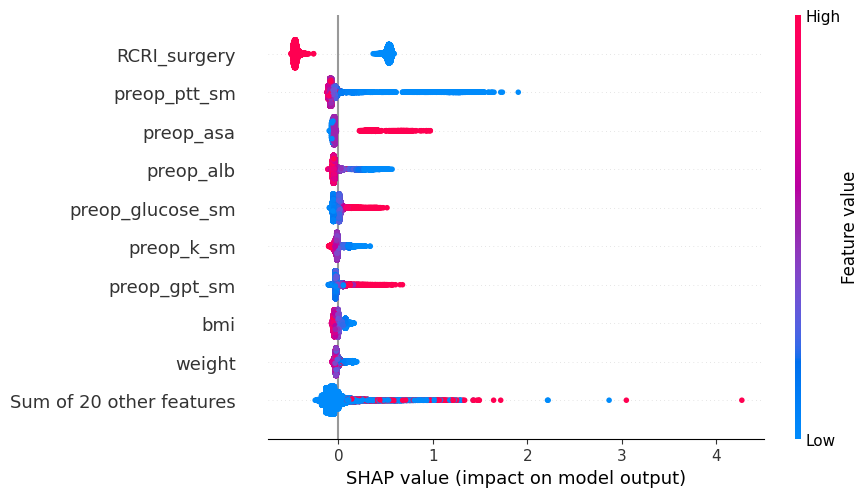

In [4]:
explainer = shap.TreeExplainer(model_cat)
shap_values = explainer.shap_values(X_train)

# shap_values를 shap.Explanation 객체로 변환
shap_exp = shap.Explanation(values=shap_values, data=X_train)

# shap.Explanation 객체를 beeswarm 함수에 전달
shap.plots.beeswarm(shap_exp)

In [3]:
# Step 1 SHAP 구간별로 나누기

# 결과를 저장할 딕셔너리
slope_change_points = {}
top_ranked_features = {}

# 각 피처에 대해 SHAP 값의 변화율 (기울기) 계산
for idx, feature in enumerate(X_train.columns):
    unique_values = X_train[feature].unique()
    
    # 범주형 변수가 0과 1만으로 구성된 경우는 스킵합니다.
    if set(unique_values) == {0, 1}:
        continue

    feature_shap_values = shap_values[:, idx]
    feature_values = X_train[feature].values
    
    # 변화율을 계산하기 전에 0으로 나누는 경우를 방지합니다.
    diff_values = np.diff(feature_values)
    non_zero_indices = diff_values != 0

    # 0으로 나누지 않는 위치에서만 기울기를 계산합니다.
    slopes = np.diff(feature_shap_values)[non_zero_indices] / diff_values[non_zero_indices]
    
    # 변화율이 가장 큰 순서대로 정렬된 인덱스 얻기
    sorted_indices = np.argsort(np.abs(slopes))[::-1]
    
    # 기울기 변화가 가장 큰 상위 1~5등 지점 선택
    top_change_points = sorted_indices[:min(5, len(sorted_indices))]
    
    # 선택한 지점의 피처 값과 해당 순위 저장
    change_points = feature_values[top_change_points]
    slope_change_points[feature] = change_points.tolist()
    top_ranked_features[feature] = {f'Rank_{i+1}': change_point for i, change_point in enumerate(change_points.tolist())}

# 출력
for feature, ranks in top_ranked_features.items():
    print(f"{feature}: 기울기 변화 상위 지점 순위: {ranks}")

age: 기울기 변화 상위 지점 순위: {'Rank_1': 49, 'Rank_2': 65, 'Rank_3': 55, 'Rank_4': 64, 'Rank_5': 52}
height: 기울기 변화 상위 지점 순위: {'Rank_1': 158.1, 'Rank_2': 160.6, 'Rank_3': 151.6, 'Rank_4': 151.6, 'Rank_5': 150.4}
weight: 기울기 변화 상위 지점 순위: {'Rank_1': 56.6, 'Rank_2': 56.6, 'Rank_3': 72.1, 'Rank_4': 84.2, 'Rank_5': 65.2}
preop_asa: 기울기 변화 상위 지점 순위: {'Rank_1': 1, 'Rank_2': 2, 'Rank_3': 2, 'Rank_4': 2, 'Rank_5': 2}
preop_egfr: 기울기 변화 상위 지점 순위: {'Rank_1': 96.4, 'Rank_2': 72.5, 'Rank_3': 85.3, 'Rank_4': 109.0, 'Rank_5': 61.3}
bmi: 기울기 변화 상위 지점 순위: {'Rank_1': 18.62150585, 'Rank_2': 26.56147525, 'Rank_3': 20.68747281, 'Rank_4': 27.49053093, 'Rank_5': 21.2109375}
preop_hb_my: 기울기 변화 상위 지점 순위: {'Rank_1': 11.8, 'Rank_2': 12.89522319, 'Rank_3': 11.0, 'Rank_4': 14.0, 'Rank_5': 12.4}
preop_plt_sm: 기울기 변화 상위 지점 순위: {'Rank_1': 245.0, 'Rank_2': 233.0, 'Rank_3': 179.0, 'Rank_4': 165.0, 'Rank_5': 163.0}
preop_alb: 기울기 변화 상위 지점 순위: {'Rank_1': 4.9, 'Rank_2': 4.4, 'Rank_3': 4.1, 'Rank_4': 2.4, 'Rank_5': 3.5}
preop_bun

In [4]:
# Step 2: SHAP값을 구간별로 계산하기

feature_shap_scores = {}

categorical_features = ["preop_htn", "preop_dm", "preop_cva", "preop_asthma", "preop_copd", "preop_liverds", "preop_kidneyds",
                        "preop_tb", "em_my", "RCRI_surgery", 'sex'] 

def calculate_feature_shap_scores(df_trainset, shap_values, slope_change_points, categorical_features):
    feature_shap_scores = {}
    for feature, change_points in slope_change_points.items():
        print(f"{feature}:")

        if len(change_points) > 0:  
            std_dev = np.std(change_points)

            # 첫 번째 값을 무조건 포함하고, 표준편차보다 큰 값만 선택
            selected_points = [round(df_trainset[feature].min(),3)] + change_points + [round(df_trainset[feature].max(),3)]  
            selected_points = list(set(selected_points))  
            selected_points.sort()  # 선택된 지점을 정렬
        
            feature_shap_scores[feature] = {}

            for i in range(len(selected_points) - 1):
                # 구간의 시작과 끝 점
                start = selected_points[i]
                end = selected_points[i + 1]

                mask = (df_trainset[feature] >= start) & (df_trainset[feature] < end)
                data_in_range = df_trainset[mask]

                if data_in_range.empty:
                    print(f"  구간 {start}~{end}은 비어있습니다.")
                else:
                    # 해당 구간 내 데이터의 SHAP 값 평균
                    feature_index = list(df_trainset.columns).index(feature)
                    shap_values_in_range = shap_values[mask, feature_index]
                    shap_score = round(shap_values_in_range.mean(),3)
                
                    # 해당 구간의 데이터 수에 따른 가중치 적용
                    weighted_shap_score = shap_score * len(data_in_range)
                    print(f"  구간 {start}~{end}: SHAP 점수 = {shap_score}, 가중치 적용 SHAP 점수 = {weighted_shap_score}")

                    feature_shap_scores[feature][(start, end)] = weighted_shap_score
        else:
            print(f"{feature}: 기울기 변화 상위 지점이 없습니다.")
    
    for feature in categorical_features:
        unique_values = df_trainset[feature].unique()
        print(f"{feature}:")

        feature_shap_scores[feature] = {}
        for val in unique_values:
            mask = df_trainset[feature] == val
            data_in_range = df_trainset[mask]  # 해당 범주에 속하는 데이터 추출
            feature_index = list(df_trainset.columns).index(feature)
        
            shap_values_for_val = shap_values[mask, feature_index]
            shap_score = round(shap_values_for_val.mean(), 3)
        
            # 해당 범주에 속하는 데이터의 수로 가중치를 적용
            weighted_shap_score = shap_score * len(data_in_range)
            print(f"  값 {val}: SHAP 점수 = {shap_score}, 가중치 적용 SHAP 점수 = {weighted_shap_score}")

            feature_shap_scores[feature][val] = weighted_shap_score
    
    return feature_shap_scores

In [5]:
# step3: 피쳐 정규화

def global_normalize_shap_scores(feature_shap_scores):
    # 모든 피처에 대한 최소 및 최대 SHAP 점수 찾기
    all_shap_values = [val for scores in feature_shap_scores.values() for val in scores.values()]
    min_score = min(all_shap_values)
    max_score = max(all_shap_values)
    
    # 모든 피처에 대한 최소 및 최대 점수를 사용하여 SHAP 점수 조정
    normalized_feature_shap_scores = {}
    for feature, shap_scores in feature_shap_scores.items():
        normalized_feature_shap_scores[feature] = {key: round(((val - min_score) / (max_score - min_score)) * 100, 2) for key, val in shap_scores.items()}
    
    return normalized_feature_shap_scores

In [6]:
def replace_with_nearest_shap_scores(data_set, normalized_feature_shap_scores, categorical_features):
    new_data_set = data_set.copy()
    
    # 범주형 변수를 먼저 처리
    for feature in categorical_features:
        feature_scores = normalized_feature_shap_scores.get(feature, {})
        for val in data_set[feature].unique():
            mask = data_set[feature] == val
            if val in feature_scores: 
                new_data_set.loc[mask, feature] = round(feature_scores[val], 2) 
            else:
                new_data_set.loc[mask, feature] = data_set.loc[mask, feature]

    # 이제 연속 변수를 처리
    for feature, feature_scores in normalized_feature_shap_scores.items():
        if feature in categorical_features:
            continue

        if len(feature_scores) == 0:
            continue

        for value in data_set[feature].unique():
            if value in feature_scores: # 범주형 변수 스킵
                continue
                
            closest_score = None
            min_distance = float('inf')
            
            for start_end, score in feature_scores.items():
                if isinstance(start_end, tuple):  
                    start, end = start_end
                else:
                    start, end = start_end, start_end
                
                if np.isnan(score):
                    continue
                
                if start <= value <= end:
                    closest_score = score
                    break
                    
                distance = min(abs(value - start), abs(value - end))
                if distance < min_distance:
                    min_distance = distance
                    closest_score = score

            if closest_score is not None:
                new_data_set.loc[new_data_set[feature] == value, feature] = round(closest_score, 2) 
                
    return new_data_set

In [7]:
shap_values_train = calculate_shap_values(model_cat, X_train)
feature_shap_scores_train = calculate_feature_shap_scores(X_train, shap_values_train, slope_change_points, categorical_features)
normalized_feature_shap_scores_train = global_normalize_shap_scores(feature_shap_scores_train)

age:
  구간 18~49: SHAP 점수 = -0.017, 가중치 적용 SHAP 점수 = -122.48500000000001
  구간 49~52: SHAP 점수 = -0.01, 가중치 적용 SHAP 점수 = -13.780000000000001
  구간 52~55: SHAP 점수 = -0.01, 가중치 적용 SHAP 점수 = -15.25
  구간 55~64: SHAP 점수 = -0.012, 가중치 적용 SHAP 점수 = -72.276
  구간 64~65: SHAP 점수 = -0.012, 가중치 적용 SHAP 점수 = -8.700000000000001
  구간 65~97: SHAP 점수 = 0.026, 가중치 적용 SHAP 점수 = 226.2
height:
  구간 135.0~150.4: SHAP 점수 = 0.014, 가중치 적용 SHAP 점수 = 32.074
  구간 150.4~151.6: SHAP 점수 = 0.002, 가중치 적용 SHAP 점수 = 1.42
  구간 151.6~158.1: SHAP 점수 = -0.002, 가중치 적용 SHAP 점수 = -11.774000000000001
  구간 158.1~160.6: SHAP 점수 = -0.01, 가중치 적용 SHAP 점수 = -27.94
  구간 160.6~194.3: SHAP 점수 = 0.001, 가중치 적용 SHAP 점수 = 13.875
weight:
  구간 30.0~56.6: SHAP 점수 = 0.048, 가중치 적용 SHAP 점수 = 375.696
  구간 56.6~65.2: SHAP 점수 = -0.023, 가중치 적용 SHAP 점수 = -174.409
  구간 65.2~72.1: SHAP 점수 = -0.028, 가중치 적용 SHAP 점수 = -130.62
  구간 72.1~84.2: SHAP 점수 = -0.03, 가중치 적용 SHAP 점수 = -123.36
  구간 84.2~135.0: SHAP 점수 = 0.019, 가중치 적용 SHAP 점수 = 26.029999999999998
preop_as

In [9]:
X_train_replaced = replace_with_nearest_shap_scores(X_train, normalized_feature_shap_scores_train,categorical_features)
X_val_replaced = replace_with_nearest_shap_scores(X_val, normalized_feature_shap_scores_train,categorical_features)
X_test_replaced = replace_with_nearest_shap_scores(X_test, normalized_feature_shap_scores_train,categorical_features)

# 토대로 AUC 성능구해보기

In [10]:
import numpy as np
from sklearn.metrics import roc_curve, confusion_matrix

def cal_matric(y_true, y_prob, bestcut=None):
    fpr, tpr, threshold = roc_curve(y_true, y_prob)
    J = tpr - fpr
    ix = np.argmax(J)
    if bestcut is None:
        best_thresh = threshold[ix]
    else:
        best_thresh = bestcut

    y_pred = np.where(y_prob >= best_thresh, 1, 0)

    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    sen = tp / (tp + fn)
    spe = tn / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)
    acc = (tp + tn) / (tp + tn + fp + fn)

    return sen, spe, ppv, npv, acc, best_thresh

# 단순히 더하는 방법

In [11]:
X_train_replaced['scoring'] = X_train_replaced.sum(axis=1)
X_val_replaced['scoring'] = X_val_replaced.sum(axis=1)
X_test_replaced['scoring'] = X_test_replaced.sum(axis=1)

In [12]:
from sklearn.metrics import roc_auc_score

def evaluate_performance(dataset_name, y_true, y_prob):
    sen, spe, ppv, npv, acc, best_thresh = cal_matric(y_true, y_prob)
    auc = roc_auc_score(y_true, y_prob)
    
    print(f"------ {dataset_name} ------")
    print(f"AUC: {auc:.3f}")
    print(f"Accuracy: {acc:.3f}")
    print(f"Sensitivity: {sen:.3f}")
    print(f"Specificity: {spe:.3f}")
    print(f"PPV: {ppv:.3f}")
    print(f"NPV: {npv:.3f}")
    print(f"Best Threshold: {best_thresh:.3f}\n")

In [13]:
evaluate_performance("Train Dataset", y_train, X_train_replaced['scoring'])
evaluate_performance("Validation Dataset", y_val, X_val_replaced['scoring'])
evaluate_performance("Test Dataset", y_test, X_test_replaced['scoring'])

------ Train Dataset ------
AUC: 0.805
Accuracy: 0.844
Sensitivity: 0.588
Specificity: 0.845
PPV: 0.014
NPV: 0.998
Best Threshold: 1489.880

------ Validation Dataset ------
AUC: 0.829
Accuracy: 0.655
Sensitivity: 0.881
Specificity: 0.654
PPV: 0.010
NPV: 0.999
Best Threshold: 1479.750

------ Test Dataset ------
AUC: 0.784
Accuracy: 0.688
Sensitivity: 0.900
Specificity: 0.683
PPV: 0.067
NPV: 0.996
Best Threshold: 1500.130



In [15]:
# X_val_replaced.to_csv("C:/Users/user/Desktop/AutoScore/Table 4/y_val_highlowrisk.csv",index=False)